# BGDÔºàBatch Gradient DescentÔºâÊâπÈáèÊ¢ØÂ∫¶‰∏ãÈôç

![](Images/9.png)

# SGDÔºàStochastic Gradient DescentÔºâÈöèÊú∫Ê¢ØÂ∫¶‰∏ãÈôç

![](Images/10.png)

# Mini-batch Gradient DescentÔºàÂ∞èÊâπÈáèÊ¢ØÂ∫¶‰∏ãÈôçÔºâ

![](Images/11.png)

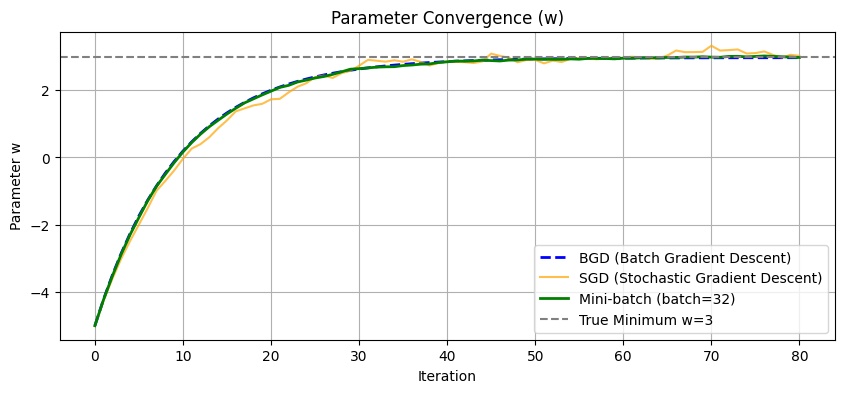

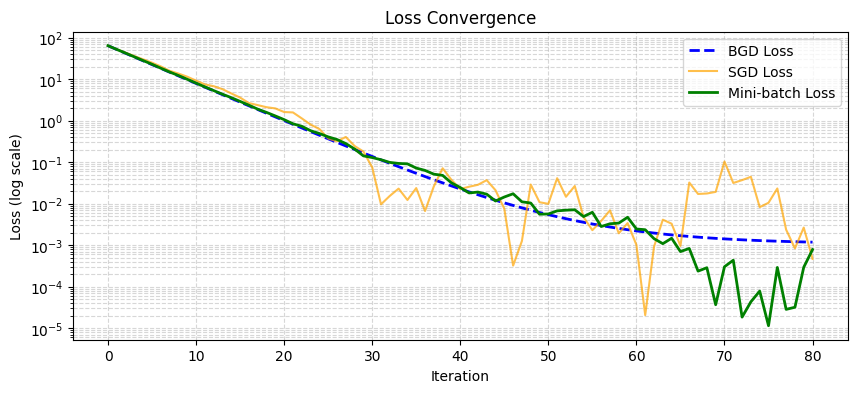

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ================================================================
# üéØ ÁõÆÊ†áÂáΩÊï∞: L(w) = (w - 3)^2
# ================================================================
def loss(w):
    return (w - 3) ** 2

np.random.seed(42)
# 200‰∏™Ê†∑Êú¨ÔºåÊØè‰∏™Ê†∑Êú¨Â∏¶Âô™Â£∞ÔºàÊ®°ÊãüÁé∞ÂÆûÊÉÖÂÜµÔºâ
data = [3 + np.random.randn() * 0.8 for _ in range(200)]

# ‰∏âÁßçÊ¢ØÂ∫¶ËÆ°ÁÆóÊñπÂºè
def grad_bgd(w):
    return np.mean([2 * (w - d) for d in data])    #2 * (w - d)ÊòØÂçï‰∏™Ê†∑Êú¨ÁöÑÊ¢ØÂ∫¶Ôºåfor d in dataÊòØÈÅçÂéÜÊâÄÊúâÊ†∑Êú¨Ôºånp.mean([...])ÊòØÂπ≥ÂùáÊ¢ØÂ∫¶

def grad_sgd(w):
    d = np.random.choice(data)   #‰ªé dataÔºàÊ†∑Êú¨ÈõÜÂêàÔºâ‰∏≠ÈöèÊú∫ÊåëÈÄâ‰∏Ä‰∏™Ê†∑Êú¨„ÄÇ
    return 2 * (w - d)           

def grad_minibatch(w, batch_size=32):
    batch = np.random.choice(data, size=batch_size)  #‰ªé dataÔºàÊâÄÊúâËÆ≠ÁªÉÊ†∑Êú¨ÔºâÈáåÈöèÊú∫ÊäΩÂèñ‰∏ÄÊâπÊ†∑Êú¨ÔºåÊäΩÂèñÊï∞ÈáèÁî± batch_size ÂÜ≥ÂÆöÔºåÈªòËÆ§ÊòØ 32
    return np.mean([2 * (w - d) for d in batch])

# ÈÄöÁî®ËÆ≠ÁªÉÂáΩÊï∞
def run(grad_func, label, lr=0.05, steps=80):
    w = -5.0
    traj_w, traj_L = [w], [loss(w)]
    for i in range(steps):
        g = grad_func(w)
        w -= lr * g
        traj_w.append(w)
        traj_L.append(loss(w))
    return traj_w, traj_L

# ËøêË°å‰∏âÁßçÊñπÊ≥ï
traj_bgd, loss_bgd = run(grad_bgd, "BGD")
traj_sgd, loss_sgd = run(grad_sgd, "SGD")
traj_mbgd, loss_mbgd = run(lambda w: grad_minibatch(w, batch_size=32), "Mini-batch")

# ================================================================
# üß≠ Âõæ 1: ÂèÇÊï∞Êî∂ÊïõËøáÁ®ã (w ÈöèËø≠‰ª£ÂèòÂåñ)
# ================================================================
plt.figure(figsize=(10, 4))
plt.plot(traj_bgd, 'b--', label="BGD (Batch Gradient Descent)", linewidth=2)
plt.plot(traj_sgd, 'orange', label="SGD (Stochastic Gradient Descent)", alpha=0.7)
plt.plot(traj_mbgd, 'g-', label="Mini-batch (batch=32)", linewidth=2)
plt.axhline(3, color='gray', linestyle='--', label="True Minimum w=3")
plt.title("Parameter Convergence (w)")
plt.xlabel("Iteration")
plt.ylabel("Parameter w")
plt.legend()
plt.grid(True)
plt.show()

# ================================================================
# üßÆ Âõæ 2: ÊçüÂ§±ÂáΩÊï∞ÂèòÂåñ (L(w))
# ================================================================
plt.figure(figsize=(10, 4))
plt.plot(loss_bgd, 'b--', label="BGD Loss", linewidth=2)
plt.plot(loss_sgd, 'orange', alpha=0.7, label="SGD Loss")
plt.plot(loss_mbgd, 'g-', label="Mini-batch Loss", linewidth=2)
plt.yscale('log')  # Áî®ÂØπÊï∞ÂùêÊ†áËÉΩÊõ¥Ê∏ÖÊ•öÁúãÊî∂ÊïõÈÄüÂ∫¶
plt.title("Loss Convergence")
plt.xlabel("Iteration")
plt.ylabel("Loss (log scale)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()
